# Drawing in logarithm scale

When showing intensity distribution, sometimes we need to analyze tiny intensity distributions that are hidden by a high intensity peak. Most of methods for visualization of intensity, present the *logarithm* parameter, which can be False, True, or a number. the function used to increase the color scale is: 

     u = np.log(logarithm * u + 1).

We show two examples where this parameter is important: The intensity distribution at the focal distance from a len, and the far field diffraction pattern of a small square aperture.

 

In [1]:
from diffractio import mm, um, nm
from diffractio import np

from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

## Intensity at the focal distance from a lens

In [2]:
radius = 3 * mm

x0 = np.linspace(-radius, radius, 512)
y0 = np.linspace(-radius, radius, 512)
xout = np.linspace(-100 * um, 100 * um, 128)
yout = np.linspace(-100 * um, 100 * um, 128)

wavelength = 550 * nm

focal = 250 * mm
z = focal

In [3]:
t0 = Scalar_mask_XY(x0, y0, wavelength)
t0.lens(r0=(0 * um, 0 * um), focal=focal, radius=radius)

u0 = Scalar_source_XY(x0, y0, wavelength)
u0.plane_wave(A=1)

u1 = t0 * u0

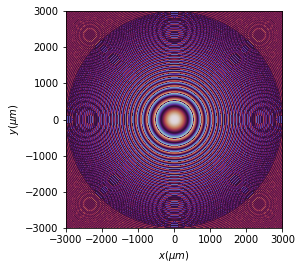

In [4]:
u1.draw("phase")

In [5]:
u2 = u1.CZT(z, xout, yout)

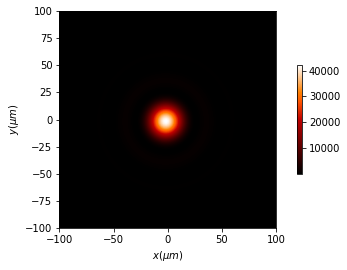

In [6]:
u2.draw(has_colorbar="vertical")

## Far field diffraction pattern of a small square aperture

In [8]:
radius = 3 * mm

x0 = np.linspace(-radius, radius, 1024)
y0 = np.linspace(-radius, radius, 1024)
xout = np.linspace(-100 * um, 100 * um, 128)
yout = np.linspace(-100 * um, 100 * um, 128)

In [9]:
focal = 2 * mm
z = focal

t0 = Scalar_mask_XY(x0, y0, wavelength)
t0.lens(r0=(0 * um, 0 * um), focal=focal, radius=radius)

t1 = Scalar_mask_XY(x0, y0, wavelength)
t1.square(r0=(0 * um, 0 * um), size=100 * um, angle=0)

u0 = Scalar_source_XY(x0, y0, wavelength)
u0.plane_wave()

u1 = t0 * t1 * u0

In [10]:
u2 = u1.CZT(z, xout, yout)

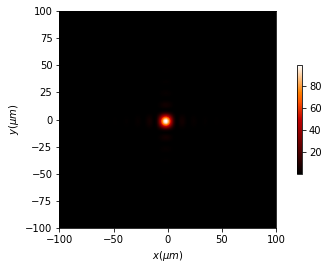

In [11]:
u2.draw(has_colorbar="vertical")

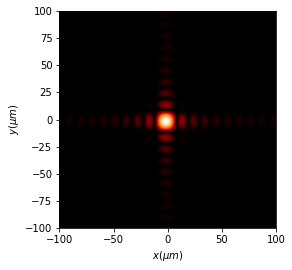

In [12]:
u2.draw(logarithm=1)

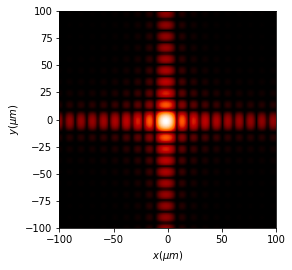

In [13]:
u2.draw(logarithm=1e2)